# License 
***
Copyright (C) 2022 -- 2025 Ayushi Chauhan, chauhayu2511@gwu.edu

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

In [ ]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [69]:
df = pd.read_excel('~/Desktop/SDF.xlsx', index_col=0, parse_dates=['created_at'])
df.head()

,created_at,Month,claim_amount,Continent,contin,country,State,numcode,Company_name,company_id,person_id,Gender,Age
type,,,,,,,,,,,,,
payment_type_paypal,1986-01-01,1,24708,North America,1,United States,AL,35211,3M,MMM,5488.0,M,58.0
payment_type_paypal,1986-02-01,2,29684,North America,1,United States,AL,35212,A. O. Smith,AOS,8143.0,F,18.0
payment_type_paypal,1986-03-01,3,20165,North America,1,United States,AL,35213,Abbott Laboratories,ABT,6378.0,F,13.0
payment_type_paypal,1986-04-01,4,21681,North America,1,United States,AL,35214,AbbVie,ABBV,6145.0,F,33.0
payment_type_paypal,1986-05-01,5,147767,North America,1,United States,AL,35215,Abiomed,ABMD,7823.0,M,81.0


In [70]:
def plot_df(df, x, y, title="Claim amount prediction", xlabel='created_at', ylabel='claim_amount', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()



# Actual Time Series 

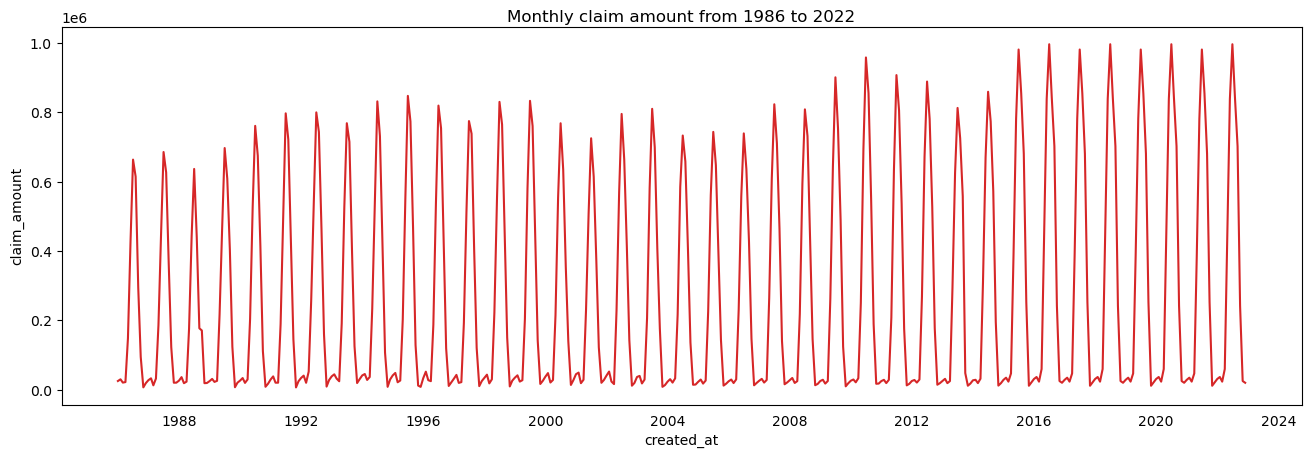

In [71]:

plot_df(df, x=df.created_at, y=df.claim_amount, title='Monthly claim amount from 1986 to 2022')    

# Box plot of the series

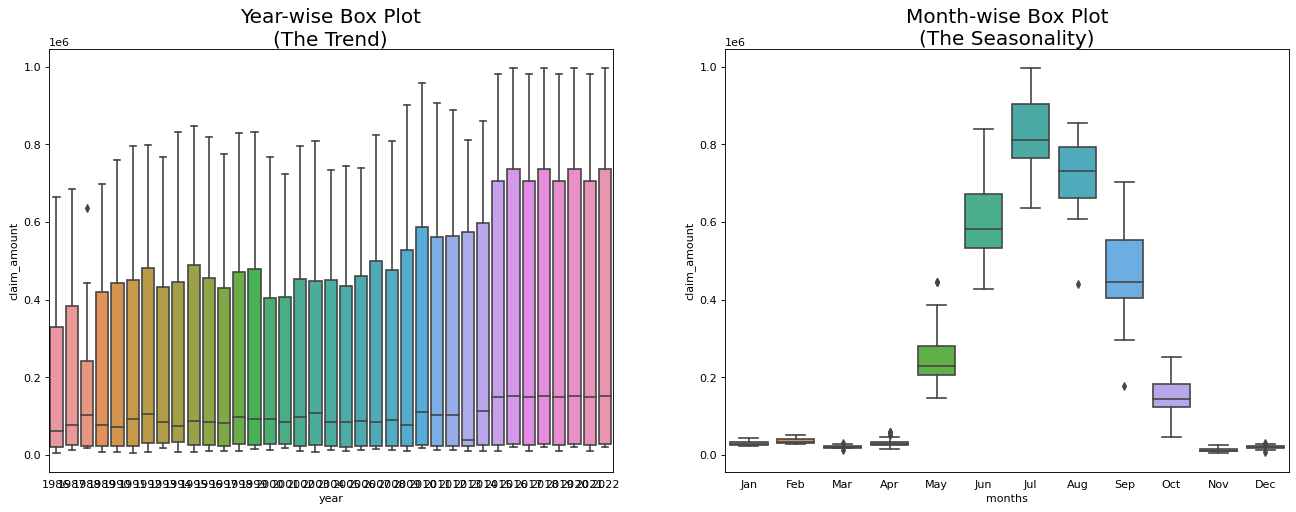

In [72]:
# Import Data
df = pd.read_excel('~/Desktop/SDF.xlsx', index_col='created_at')
df.reset_index(inplace=True)


# Prepare data
df['year'] = [d.year for d in df.created_at]
df['months'] = [d.strftime('%b') for d in df.created_at]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='claim_amount', data=df, ax=axes[0])
sns.boxplot(x='months', y='claim_amount', data=df.loc[~df.year.isin([1996, 2022]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

# ACF and PACF

/Users/ayushichauhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/Users/ayushichauhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/Users/ayushichauhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


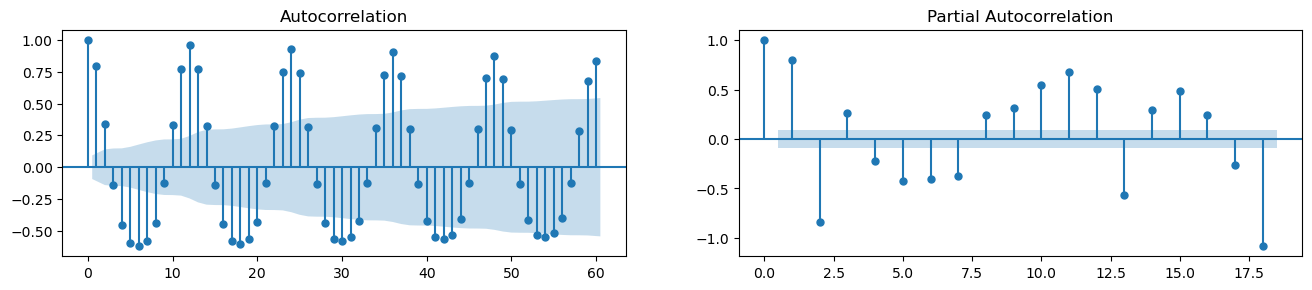

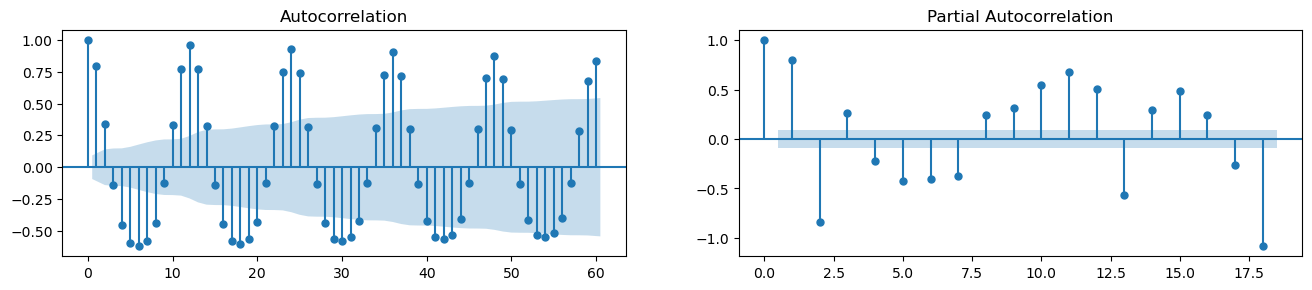

In [6]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Calculate ACF and PACF upto 50 lags
acf_50 = acf(df.claim_amount, nlags=50)
pacf_50 = pacf(df.claim_amount, nlags=50)
#print("PACF: ",pacf_50)

# Draw Plot
fig, axes = plt.subplots(1,2, figsize=(16,3), dpi= 100)
plot_acf(df.claim_amount.tolist(), lags=60, ax=axes[0])
plot_pacf(df.claim_amount.tolist(), lags=18, ax=axes[1])


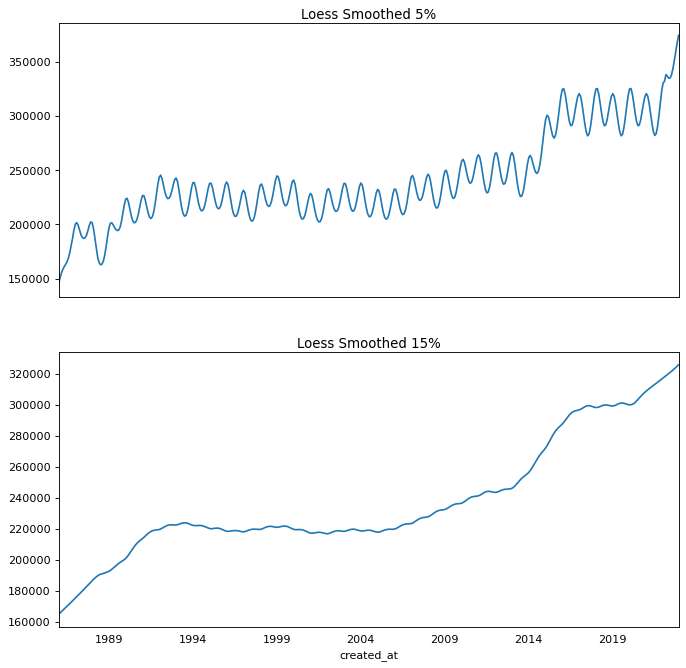

In [73]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad': 4})
df_ma = df.claim_amount.rolling(210, center=False, closed='both').mean()

# Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df.claim_amount, np.arange(len(df.claim_amount)), frac=0.05)[:, 1], index=df.created_at, columns=['claim_amount'])
df_loess_15 = pd.DataFrame(lowess(df.claim_amount, np.arange(len(df.claim_amount)), frac=0.15)[:, 1], index=df.created_at, columns=['claim_amount'])

# Plot
fig, axes = plt.subplots(2,1, figsize=(10, 10), sharex=True, dpi=80)
df_loess_5['claim_amount'].plot(ax=axes[0], title='Loess Smoothed 5%')
df_loess_15['claim_amount'].plot(ax=axes[1], title='Loess Smoothed 15%')

plt.show()



# Simple Exponential Smoothening

/Users/ayushichauhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


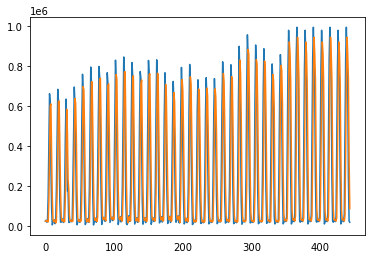

In [77]:
from statsmodels.tsa.api import SimpleExpSmoothing
es = SimpleExpSmoothing(df.claim_amount.values)
es.fit(smoothing_level=0.8)
plt.plot(df.claim_amount.values)
plt.plot(es.predict(es.params, start=0, end=None))
plt.show()

### Results: 
The Series is already smooth for the given dataset so, smoothening is not required.

# Stationary or Non-Stationary series

In [78]:
from statsmodels.tsa.stattools import adfuller

In [221]:
test_result=adfuller(df['claim_amount'])
test_result
def adfuller_test(amount):
    result=adfuller(amount)
    labels = ['ADF Test Statistic','p-value','# of Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is Stationary")
    else:
        print("Weak evidence against null hypothesis,indicating it is Non-Stationary ")



In [222]:
adfuller_test(df['claim_amount'])

ADF Test Statistic : -0.99916608535741
p-value : 0.7535683308711256
# of Lags Used : 12
Number of Observations : 431
Weak evidence against null hypothesis,indicating it is Non-Stationary 


# First order difference of the series

In [81]:
df['Claim amount First Difference'] = df['claim_amount'] - df['claim_amount'].shift(1)
df['Seasonal First Difference']=df['claim_amount']-df['claim_amount'].shift(12)
df.head(10)

,created_at,type,Month,claim_amount,Continent,contin,country,State,numcode,Company_name,company_id,person_id,Gender,Age,year,months,Claim amount First Difference,Seasonal First Difference
0,1986-01-01,payment_type_paypal,1,24708,North America,1,United States,AL,35211,3M,MMM,5488.0,M,58.0,1986,Jan,NaN,NaN
1,1986-02-01,payment_type_paypal,2,29684,North America,1,United States,AL,35212,A. O. Smith,AOS,8143.0,F,18.0,1986,Feb,4976.0,NaN
2,1986-03-01,payment_type_paypal,3,20165,North America,1,United States,AL,35213,Abbott Laboratories,ABT,6378.0,F,13.0,1986,Mar,-9519.0,NaN
3,1986-04-01,payment_type_paypal,4,21681,North America,1,United States,AL,35214,AbbVie,ABBV,6145.0,F,33.0,1986,Apr,1516.0,NaN
4,1986-05-01,payment_type_paypal,5,147767,North America,1,United States,AL,35215,Abiomed,ABMD,7823.0,M,81.0,1986,May,126086.0,NaN
5,1986-06-01,payment_type_paypal,6,427968,North America,1,United States,AL,35216,Accenture,ACN,7094.0,M,22.0,1986,Jun,280201.0,NaN
6,1986-07-01,payment_type_paypal,7,663205,North America,1,United States,AL,35217,Activision Blizzard,ATVI,6794.0,F,76.0,1986,Jul,235237.0,NaN
7,1986-08-01,payment_type_paypal,8,614295,North America,1,United States,AL,35218,ADM,ADM,6233.0,F,78.0,1986,Aug,-48910.0,NaN
8,1986-09-01,payment_type_paypal,9,295089,North America,1,United States,AL,35221,Adobe,ADBE,4641.0,M,12.0,1986,Sep,-319206.0,NaN
9,1986-10-01,payment_type_paypal,10,94106,North America,1,United States,AL,35222,Advance Auto Parts,AAP,5181.0,M,28.0,1986,Oct,-200983.0,NaN


In [82]:
# Again testing if data is stationary
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -5.547449864601668
p-value : 1.648550540797001e-06
# of Lags Used : 12
Number of Observations : 419
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


<AxesSubplot:>

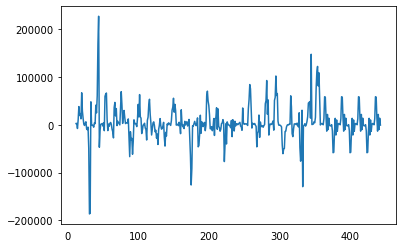

In [83]:
df['Seasonal First Difference'].plot()

#### ACF and PACF of the Differenced Series

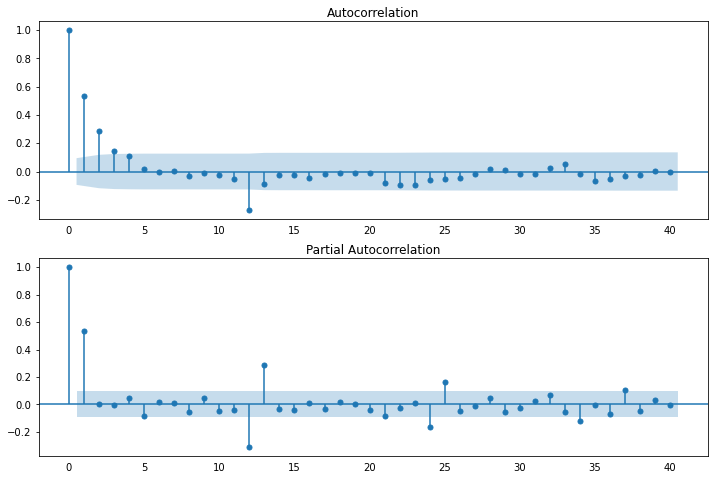

In [84]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

# SARIMAX (1,2,1) on claim_amount

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15216D+01    |proj g|=  2.00950D-01

At iterate    5    f=  1.14790D+01    |proj g|=  3.84899D-02


 This problem is unconstrained.



At iterate   10    f=  1.14542D+01    |proj g|=  8.05729D-03

At iterate   15    f=  1.14514D+01    |proj g|=  1.72699D-03

At iterate   20    f=  1.14513D+01    |proj g|=  3.53994D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     27      1     0     0   8.792D-06   1.145D+01
  F =   11.451261770100661     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


<AxesSubplot:>

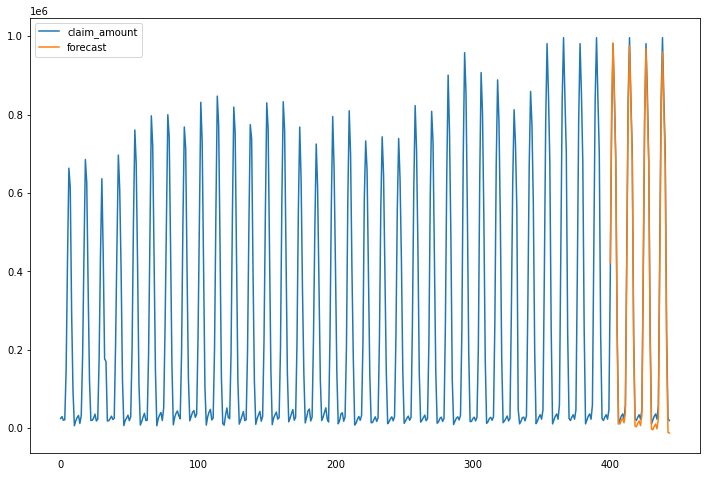

In [59]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['claim_amount'],order=(1, 2, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df['forecast']=results.predict(start=400,end=480,dynamic=True)
df[['claim_amount','forecast']].plot(figsize=(12,8))

### SARIMAX on Differenced Series

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17343D+01    |proj g|=  9.57273D-03

At iterate    5    f=  1.17247D+01    |proj g|=  1.26457D-02

At iterate   10    f=  1.17226D+01    |proj g|=  2.45834D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     18      1     0     0   1.304D-05   1.172D+01
  F =   11.722605217021135     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<AxesSubplot:>

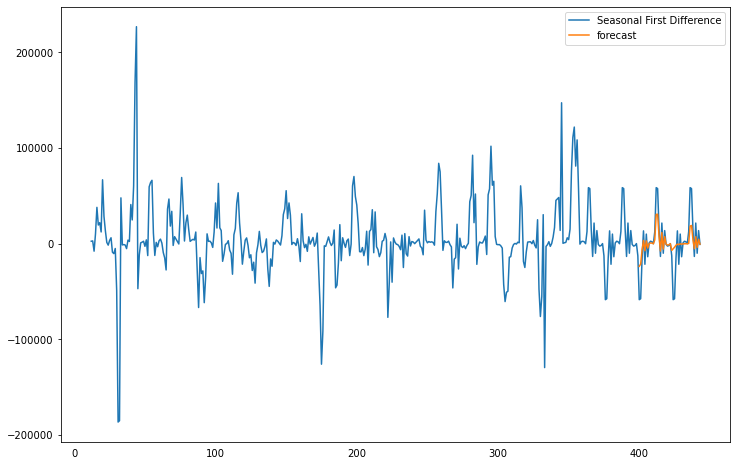

In [67]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Seasonal First Difference'],order=(1, 1, 1),seasonal_order=(1,1,0,12))
results=model.fit()
df['forecast']=results.predict(start=400,end=580,dynamic=True)
df[['Seasonal First Difference','forecast']].plot(figsize=(12,8))

# ARIMA (2,0,3)

In [107]:
#Creating a new Dataframe
df1 = pd.DataFrame(columns=['date', 'claim_amount'])
df1[['date', 'claim_amount']] = df[['created_at', 'claim_amount']].dropna()

In [128]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df1['claim_amount'],order=(2,0,3))
model_fit=model.fit()
model_fit.summary()

/Users/ayushichauhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29107D+01    |proj g|=  6.81465D+03
  ys=-8.724E-04  -gs= 2.226E-04 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3     35      1     1     0   1.116D+04   1.291D+01
  F =   12.910600238523047     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/ayushichauhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/ayushichauhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           claim_amount   No. Observations:                  444
Model:                     ARMA(2, 3)   Log Likelihood               -5732.307
Method:                       css-mle   S.D. of innovations          94760.174
Date:                Wed, 27 Apr 2022   AIC                          11478.613
Time:                        19:12:27   BIC                          11507.284
Sample:                             0   HQIC                         11489.919
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.707e+05        nan        nan        nan         nan         nan
ar.L1.claim_amount     1.7321        nan        nan        nan         nan         nan
ar.L2.claim_amount    -1.0000        nan        nan        nan         nan         nan
ma.L1.claim_amount    -0.9935      0.023    -44.030      0.000      -1.038      -0.949
ma.L2.claim_amount    -0.3708      0.035    -10.512      0.000      -0.440      -0.302
ma.L3.claim_amount     0.7520      0.022     33.792      0.000       0.708       0.796
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8661           -0.4999j            1.0000           -0.0833
AR.2            0.8661           +0.4999j            1.0000            0.0833
MA.1           -1.3034           -0.0000j            1.3034           -0.5000
MA.2            0.8982           -0.4620j            1.0101           -0.0756
MA.3            0.8982           +0.4620j            1.0101            0.0756
-----------------------------------------------------------------------------
"""

<AxesSubplot:>

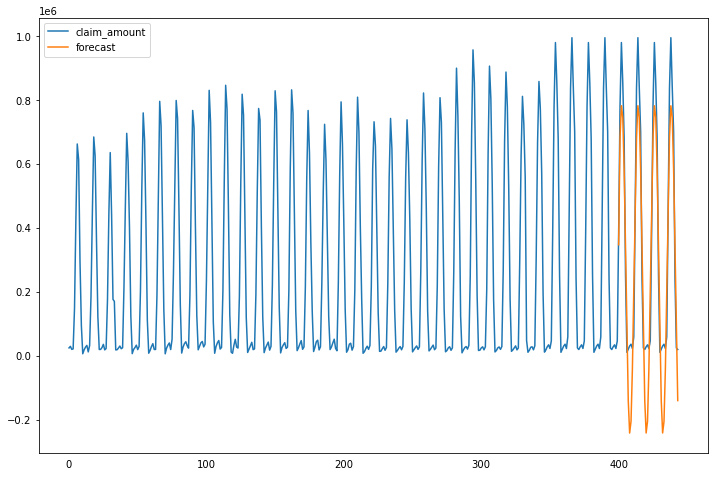

In [129]:
df1['forecast']=model_fit.predict(start=400,end=480,dynamic=True)
df1[['claim_amount','forecast']].plot(figsize=(12,8))

#### Encoding the data

In [131]:
# importing pandas
import pandas as pd
# importing numpy
import numpy as np
# importing OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [207]:
new_df = pd.read_excel('~/Desktop/SDF.xlsx',usecols=['claim_amount','country','contin']) 
new_df.head()
cat = df.select_dtypes(include='O').keys()

cat

Index(['type', 'Continent', 'country', 'State', 'numcode', 'Company_name',
       'company_id', 'Gender', 'months'],
      dtype='object')

In [208]:
# unique values in each columns
for x in new_df.columns:
    #prinfting unique values
    print(x ,':', len(new_df[x].unique()))

claim_amount : 372
contin : 6
country : 48


In [209]:
new_df.country.value_counts().sort_values(ascending=False).head(20)

United States     297
Ireland            29
Japan              18
United Kingdom     14
Luxembourg         13
Germany             7
Australia           7
France              5
Pakistan            4
Brazil              3
Norway              3
Iceland             2
Colombia            2
South Africa        2
French Guiana       2
Nigeria             2
Switzerland         2
Italy               2
Seychelles          1
New Zealand         1
Name: country, dtype: int64

In [210]:
# make binary of labels

for label in top_10:
    new_df[label] = np.where(new_df['country']==label,1,0)
new_df[['country']+top_10]

,country,United States,Ireland,Japan,United Kingdom,Luxembourg,Germany,Australia,France,Pakistan,Brazil
0,United States,1,0,0,0,0,0,0,0,0,0
1,United States,1,0,0,0,0,0,0,0,0,0
2,United States,1,0,0,0,0,0,0,0,0,0
3,United States,1,0,0,0,0,0,0,0,0,0
4,United States,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
439,United States,1,0,0,0,0,0,0,0,0,0
440,United States,1,0,0,0,0,0,0,0,0,0
441,United States,1,0,0,0,0,0,0,0,0,0
442,United States,1,0,0,0,0,0,0,0,0,0


In [211]:
# for all categorical variables we selected
def top_x(df2,variable,top_x_labels):
    for label in top_x_labels:
        df2[variable+'_'+label] = np.where(data[variable]==label,1,0)
        # read the data again
data = pd.read_excel('~/Desktop/SDF.xlsx',usecols = ['claim_amount','country','contin'])
        #encode Nighborhood into the 10 most frequent categories
top_x(data,'country',top_10)
        # display data
data.head()


,claim_amount,contin,country,country_United States,country_Ireland,country_Japan,country_United Kingdom,country_Luxembourg,country_Germany,country_Australia,country_France,country_Pakistan,country_Brazil
0,24708,1,United States,1,0,0,0,0,0,0,0,0,0
1,29684,1,United States,1,0,0,0,0,0,0,0,0,0
2,20165,1,United States,1,0,0,0,0,0,0,0,0,0
3,21681,1,United States,1,0,0,0,0,0,0,0,0,0
4,147767,1,United States,1,0,0,0,0,0,0,0,0,0


# One hot encoding on Continents and Payment type

In [217]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

dataset = pd.read_excel('~/Desktop/SDF.xlsx',usecols=['contin','country','type']) 
# retrieve the array of data
data = dataset.values

# separate into input and output columns
X = data[:, :1].astype(str)
y = data[:, 1].astype(str)
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# one-hot encode input variables
onehot_encoder = OneHotEncoder()
onehot_encoder.fit(X_train)
X_train = onehot_encoder.transform(X_train)
X_test = onehot_encoder.transform(X_test)
# ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
# define the model
model = LogisticRegression()
# fit on the training set
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 64.63


# Ordinal encoding on Continents and Payment type

In [218]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
# define the location of the dataset

dataset = pd.read_excel('~/Desktop/SDF.xlsx',usecols=['contin','country','type']) 
# retrieve the array of data
data = dataset.values
# separate into input and output columns
X = data[:, :1].astype(str)
y = data[:, 1].astype(str)
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# ordinal encode input variables
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(X_train)
X_train = ordinal_encoder.transform(X_train)
X_test = ordinal_encoder.transform(X_test)
# ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
# define the model
model = LogisticRegression()
# fit on the training set
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 67.35


### Results: 
On our dataset, Ordinal transform gives better results than One hot encoder. 